In [1]:
'''
Given two vectors x and y in R^n, please implement an algorithm 
to compute a scalar beta that minimizes || beta * x - y ||_1, 
and explain its complexity.
'''
%matplotlib inline
import matplotlib
import matplotlib.pyplot as pyplot

import numpy
import time
import math

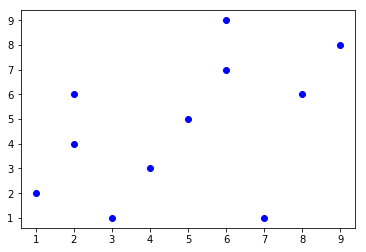

In [2]:
x = numpy.array([3, 1, 2, 4, 2, 5, 8, 6, 9, 6, 7])
y = numpy.array([1, 2, 6, 3, 4, 5, 6, 7, 8, 9, 1])

# how data looks like
pyplot.plot(x, y, "bo")

In [3]:
# f(x) = bx
f = lambda x: b * x

In [4]:
# plot f(x) as line for better visualization
def plotf():
    px, py = zip(*sorted(zip(x, map(f, x))))
    pyplot.plot(px, py, "r")

In [5]:
def lossf():
    return reduce(lambda x,y: x+y, \
              map(lambda (x,y,z): math.fabs(z - y), zip(x, y, f(x))))

def derivative():
    return reduce(lambda x,y: x+y, \
              map(lambda (x,y,z): (z-y) / math.fabs(z - y), zip(x, y, f(x))))

In [6]:
# minimize loss by gradient decent
def optimize(iterations):
    global b, nits, minloss, minb
    minloss_local = minloss
    for it in range(iterations):
        loss = lossf()
        
        # track 'local' minloss & b
        if loss < minloss_local: 
            minloss_local = loss
            minb_local = b
        
        gd = lossf() * derivative() / len(x) # gradient 
        b = b - a * gd
        plotf()

    pyplot.grid()
    pyplot.legend()
    pyplot.plot(x, y, "bo")
    pyplot.title('iterations %d-%d, loss %.4f, gd %0.4f, b %0.4f' % \
              (nits, nits + iterations, loss, gd, b))
    pyplot.show()
    pyplot.clf()

    nits += iterations
    
    # say yes if any progress
    if  minloss > minloss_local:
        minloss = minloss_local
        minb = minb_local
        return True
    else:
        return False

52.0


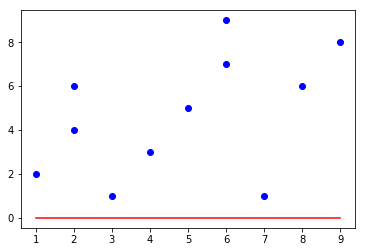

In [7]:
# initial beta & loss
b = 0      # beta
a = 0.001   # alpha (learning rate)
nits = 0     # iterations so far
minloss = lossf()
minb = b

# plot initial status
print lossf()
plotf()
pyplot.plot(x, y, "bo")

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


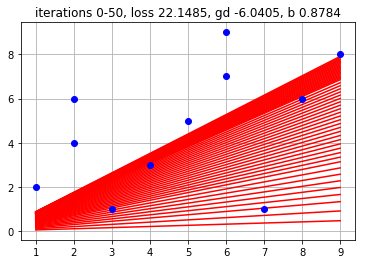

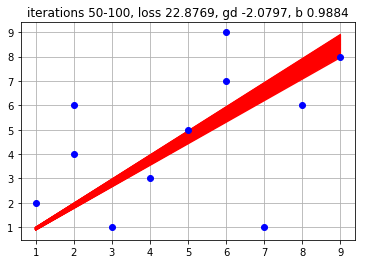

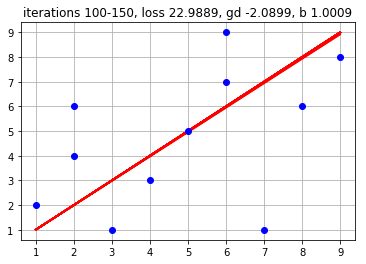

min loss 22.014179, min beta 0.890464


In [8]:
# run mini batches till convergence
while optimize(50):
    continue

print 'min loss %f, min beta %f' % (minloss, minb)        

To achieve an accuracy of e for the objective function, this script
takes O(1/e) iterations. If vectors x and y are of size N, the time 
complexity of calculating the gradient in each iteration is O(N), 
so the total time complexity is O(N/e).